## Vikash Patel

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/vpatel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


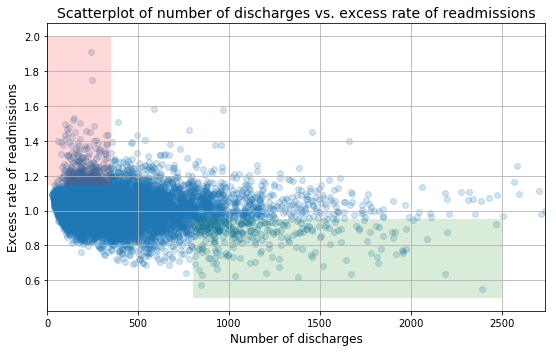

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
clean_hospital_read_df.shape

(11578, 12)

In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


There seem to be a number of entries with the value 0 for discharges, which in-turn have resulted in NaN values for readmissions. To further clean up the data set and arrive at a clearer conclusion, I will drop these respective rows with NaN values.

In [10]:
df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions'])
print(df.shape)
print('The lowest number of discharges is now %.f.' % df['Number of Discharges'].min())

(11497, 12)
The lowest number of discharges is now 25.


It looks like the number of rows decreased from 11578 to 11497. That is a difference of 81 observations with zero discharges and unavailable readmission data. We should now be able to reanalyze the cleaner data set to confirm or deny the preliminary report.

## Investigating initial observations

The overall claim was made that as the number of discharges increases, the rate of readmissions decreases.

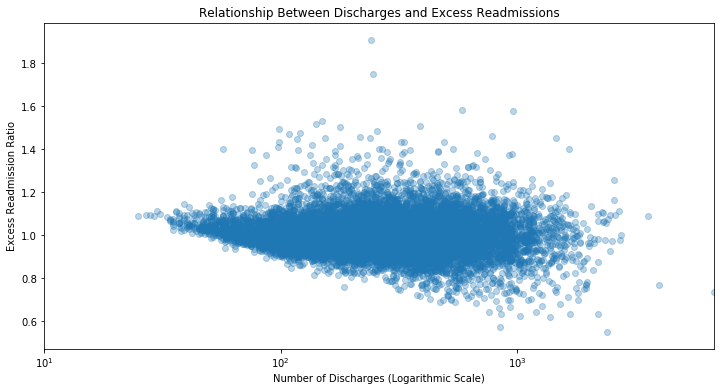

In [18]:
x = df['Number of Discharges']
y = df['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, alpha=0.3)
ax.set_xscale('symlog')
ax.set_xlim([10, max(x)])
plt.title('Relationship Between Discharges and Excess Readmissions')
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Number of Discharges (Logarithmic Scale)')
plt.show()

By looking at the scatter plot above, there is no conclusive visual evidence that a negative relationship exists between the number of discharges and the excess readmission ratio.

## Investigating statistics

The following statistical claims were made in the preliminary report:

1. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
2. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1



In [20]:
df_100 = df[df['Number of Discharges'] < 100]
df_1000 = df[df['Number of Discharges'] > 1000]

num_discharges_100 = len(df_100)
num_discharges_1000 = len(df_1000)

mean_100 = df_100['Excess Readmission Ratio'].mean()
prop_100 = len(df[(df['Number of Discharges'] < 100) & (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio']) / num_discharges_100

mean_1000 = df_1000['Excess Readmission Ratio'].mean()
prop_1000 = len(df[(df['Number of Discharges'] > 1000) & (df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio']) / num_discharges_1000

print('For hospitals/facilities with number of discharges < 100:')
print('Mean excess readmission rate: %.3f' % mean_100)
print('Percent with excess readmission rate greater than 1: %.3f%%' % (prop_100*100))
print()
print('For hospitals/facilities with number of discharges > 1000:')
print('Mean excess readmission rate: %.3f' % mean_1000)
print('Percent with excess readmission rate greater than 1: %.3f%%' % (prop_1000*100))

For hospitals/facilities with number of discharges < 100:
Mean excess readmission rate: 1.023
Percent with excess readmission rate greater than 1: 63.215%

For hospitals/facilities with number of discharges > 1000:
Mean excess readmission rate: 0.978
Percent with excess readmission rate greater than 1: 44.492%


The statistical claims made look to be correct.

## Investigating correlation

The preliminary report claimed that "there is a significant correlation between hospital capacity (number of discharges) and readmission rates."

In [21]:
df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The following correlation matrix informs us of a correlation of -0.097 between number of discharges and the excess readmission ratio. The claim stated that there is a "significant correlation". This is not true, as a correlation coefficient of -0.097 indicates a very weak negative relationship. The preliminary report's correlation claim is therefore incorrect.

## Investigating the report's recommendations

A recommendation was made to hold smaller hospitals/facilities more accountable of their resources to avoid excess readmissions. I will look at the distributions for hospitals with less than 300 discharges and with more than 300 discharges to determine whether this is a valid recommendation.

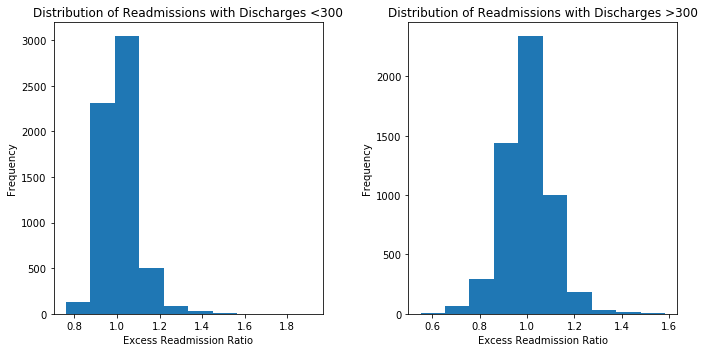

In [25]:
df_l300 = df[df['Number of Discharges'] < 300]
df_g300 = df[df['Number of Discharges'] >= 300]


plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
df_l300['Excess Readmission Ratio'].plot(kind='hist', title='Distribution of Readmissions with Discharges <300')
plt.xlabel('Excess Readmission Ratio')
plt.subplot(1, 2, 2)
df_g300['Excess Readmission Ratio'].plot(kind='hist', title='Distribution of Readmissions with Discharges >300')
plt.xlabel('Excess Readmission Ratio')
plt.tight_layout()
plt.show()

Although the distribution for readmissions with discharges < 300 seeming slightly skewed to the left, both distributions seem relatively similar. Therefore, this recommendation comes across as weak and could be ineffective.